## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [343]:
dataset = pd.read_csv('titanic.csv')

print(dataset.describe())
print(dataset.shape)
print(dataset.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [344]:
missing_values = dataset.isnull().sum()

print("Кількість пропущених значень:")
print(missing_values)

Кількість пропущених значень:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: датасет titanic.csv містить пропущені значення по атрибуиах Вік(Age), Каюта(Cabin) та Порт(Embarked). Найменше інформації про номери кают пасажирів. Для вирішення проблеми з віком можна використати медіану.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



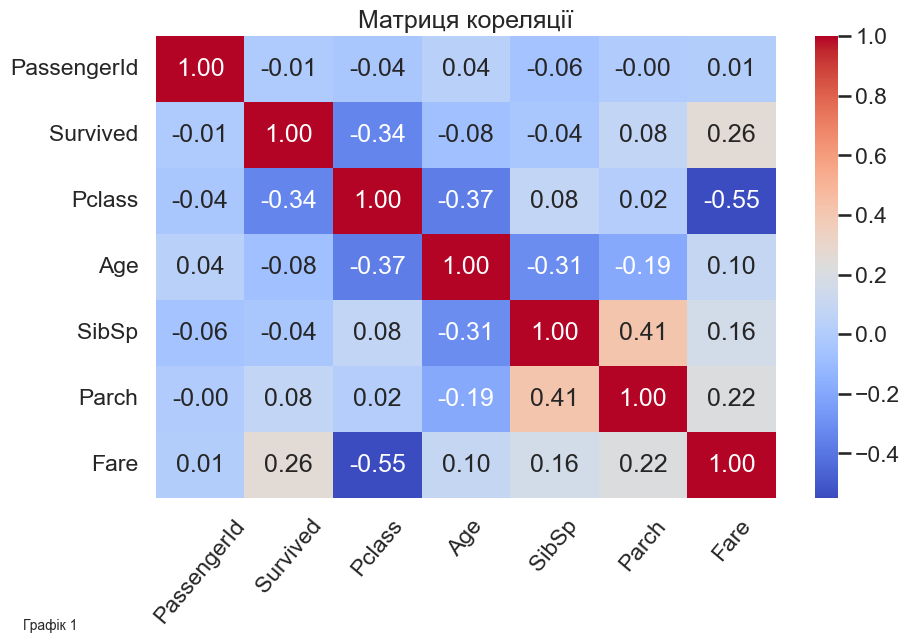

In [345]:
numeric_dataframe = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataframe.corr(method='pearson')

plt.figure(figsize=(10, 6))
plt.xticks(rotation=50)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції')
plt.text(-1.5, 9, 'Графік 1', fontsize=10, ha='left')
plt.show()

Ваші висновки: більшість результатів на графіку 1 вказують на те що тут практично відсутня кореляція, бо мало значень, які наближені до -1 або 1.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [346]:
def fill_missing_values(df, column_name, groupby_cols):

    dataframe_filled = df.copy()
    dataframe_filled[column_name] = dataframe_filled.groupby(groupby_cols)[column_name].transform(lambda x: x.fillna(x.median()))
    return dataframe_filled

filled_dataset = fill_missing_values(dataset, 'Age', ['Sex', 'Pclass'])

print("Перевірка на пропущені значення:")
print(filled_dataset.isnull().sum())

Перевірка на пропущені значення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: щоб заповнити відсутні значення в стовпці «Вік», потрібно скористатися медіаною, яка обчислюється в «Стать» і «Pclass». Згідно оновленої перевірки, стовпець "Вік" більше не має пропущених значень.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





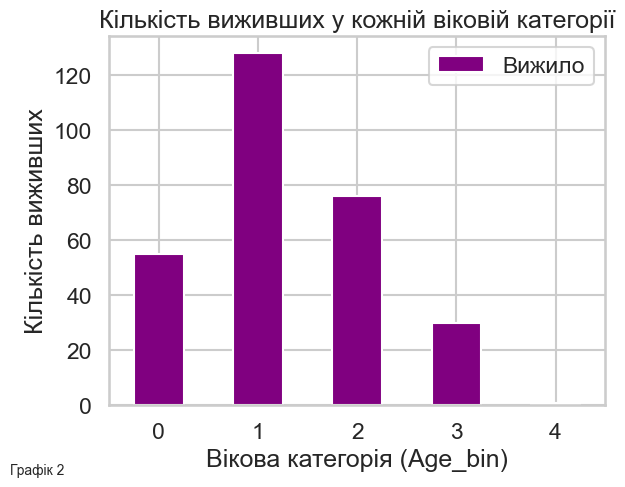

In [347]:
age_bins = [0, 16, 32, 48, 64, 80]
age_labels = [0, 1, 2, 3, 4]

dataset['Age_bin'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

survivors_dataset = dataset[dataset['Survived'] == 1]

survivors_by_age_bin = survivors_dataset.groupby('Age_bin', observed=False).size()

survivors_by_age_bin.plot(kind='bar', color='purple')
plt.xlabel('Вікова категорія (Age_bin)')
plt.ylabel('Кількість виживших')
plt.title('Кількість виживших у кожній віковій категорії')
plt.legend(['Вижило'], loc='upper right')
plt.xticks(rotation=0)
plt.text(-1.5, -25, 'Графік 2', fontsize=10, ha='left')
plt.show()

Ваші висновки: згідно графіку 2 найбільша кількість вижвиших припадає на 1 вікову групу (16-32 років), після чого йде 2 вікова група (32-48 років), 0 вікова група (48-64 років) і 3 вікова група (64-80 років), у 4 вікової групи відсутні значення.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [348]:
from scipy.stats import chi2_contingency

dataset['Fare_quartile'] = pd.qcut(dataset['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

survivors_by_fare_quartile = dataset.groupby(['Fare_quartile', 'Survived'], observed=False).size().unstack()

chi2_stat, p_val, _, _ = chi2_contingency(survivors_by_fare_quartile)

print(f"Chi-square статистика: {chi2_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Різниця в кількості вижвиших у різних квартилях є значною")
else:
    print("Немає значної різниці в кількості виживших у різних квартилях")


Chi-square статистика: 80.17393102947467
P-value: 2.816616687453629e-17
Різниця в кількості вижвиших у різних квартилях є значною


Ваші висновки: ґрунтуючись на результатах тесту хі-квадрат, можна побачити, що кількість виживших пасажирів для квартильних значень змінної ```fare``` значно відрізняється. Значення 2.816616687453629e-17 значно менше за звичайний рівень значущості 0.05

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [349]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']

dataset['Alone'] = dataset['Family_size'].apply(lambda x: 'Alone' if x == 0 else 'With Family')

survival_by_family_size = dataset.groupby(['Family_size', 'Survived']).size().unstack()

print("Виживаність за кількістю членів сім'ї:")
print(survival_by_family_size)

survival_percentage = (survival_by_family_size[1] / survival_by_family_size.sum(axis=1)) * 100

print("Відсоток виживших пасажирів залежно від кількості членів їх сім'ї:")
print(survival_percentage)

Виживаність за кількістю членів сім'ї:
Survived         0      1
Family_size              
0            374.0  163.0
1             72.0   89.0
2             43.0   59.0
3              8.0   21.0
4             12.0    3.0
5             19.0    3.0
6              8.0    4.0
7              6.0    NaN
10             7.0    NaN
Відсоток виживших пасажирів залежно від кількості членів їх сім'ї:
Family_size
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7           NaN
10          NaN
dtype: float64


Ваші висновки: даний аналіз підтверджує гіпотезу про те, що на рівень виживання пасажирів впливала кількість членів сім’ї, з якою вони подорожували. Ті пасажири, які подорожували поодинці, мали нижчу ймовірність виживання, а ті, хто подорожував із членами сім’ї, мали вищі показники виживання, особливо для невеликі сім’ї.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [350]:
updated_dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Ваші висновки: Видалення цих атрибутів може оптимізувати набір даних, покращити якість даних і зосередитися на функціях, які є більш актуальними та інформативними для аналізу виживання. Крім того, стовпець Каюта (Cabin) має багато пропущених значень.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [351]:
dataset['Sex'] = dataset['Sex'].fillna('Unknown')
dataset['Embarked'] = dataset['Embarked'].fillna('Unknown')

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
title_mapping = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3}

dataset['Sex'] = dataset['Sex'].map(sex_mapping)
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
dataset['Title'] = dataset['Title'].map(title_mapping)

dataset['Title'] = dataset['Title'].fillna(4)

print(dataset[['Sex', 'Embarked', 'Title']].head())

   Sex  Embarked  Title
0    0       0.0    0.0
1    1       1.0    1.0
2    1       0.0    2.0
3    1       0.0    1.0
4    0       0.0    0.0


Ваші висновки: Для змінної ```Sex``` було створено два числових значення - 0 для чоловічої статі і 1 для жіночої, ```Embarked``` - 0 для порту S, 1 для C і 2 для Q, ```Title``` - 0 для Mr, 1 для Mrs, 2 для Miss та 3 для Master.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



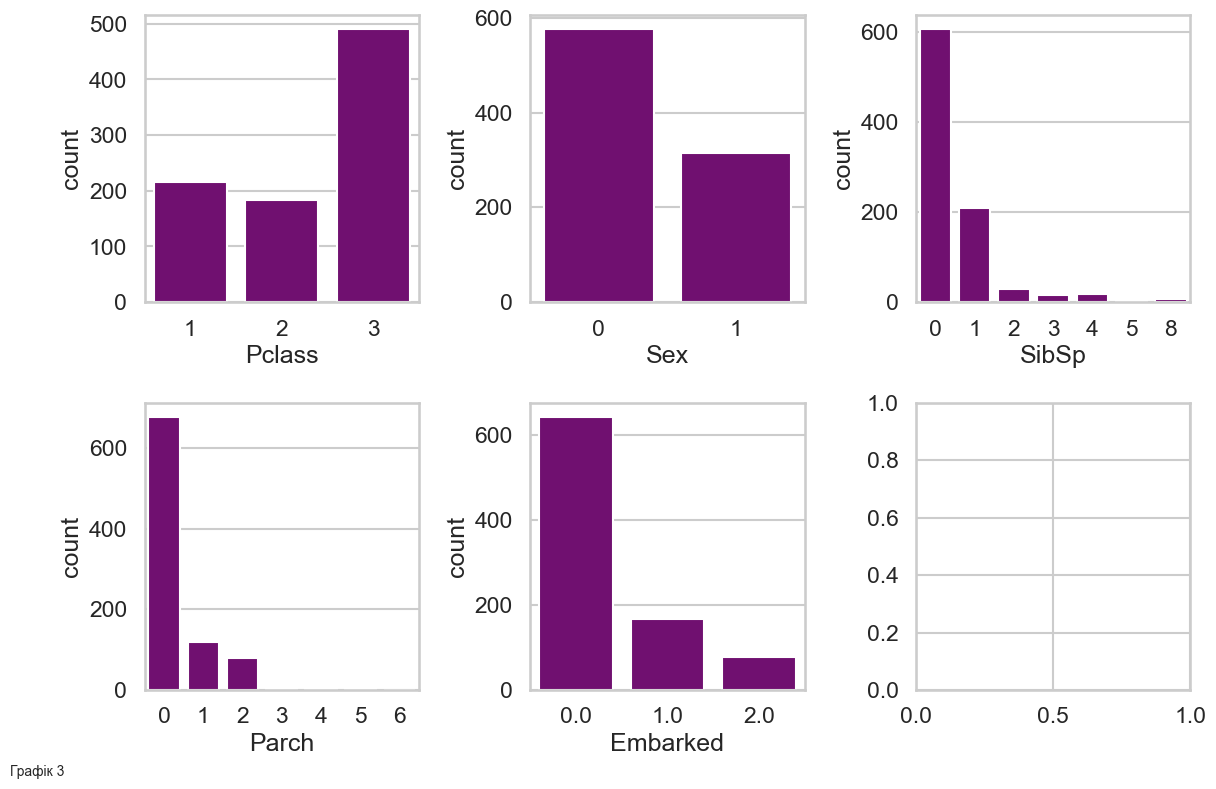

In [352]:
categorical_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(12,8))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=dataset, ax=axes[i // 3, i % 3], color='purple')

plt.tight_layout()
plt.text(-3.3, -0.3, 'Графік 3', fontsize=10, ha='left')
plt.show()

Ваші висновки: на графіку 3 зображено використані нові числові значення для ```Sex``` та ```Embarked```. Це допомагає спростити аналіз в деяких випадках.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

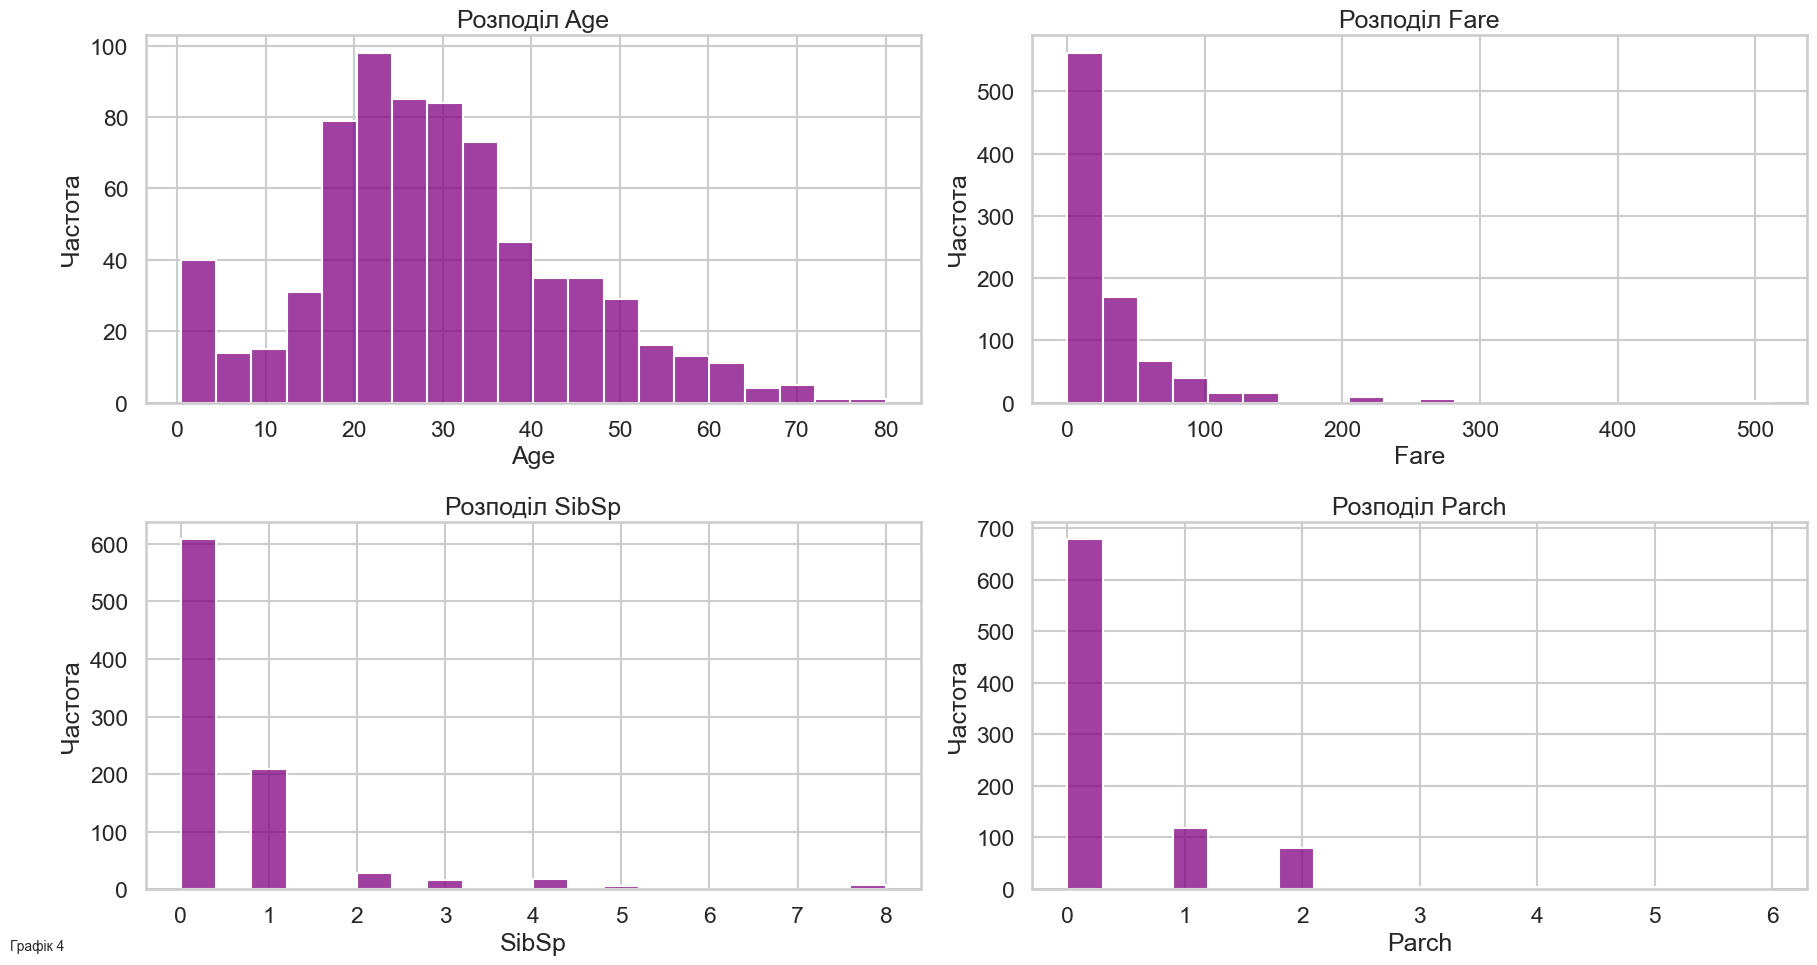

In [353]:
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i, var in enumerate(numeric_vars):
    sns.histplot(dataset[var], bins=20, ax=axes[i // 2, i % 2], color='purple')
    axes[i // 2, i % 2].set_title(f'Розподіл {var}')
    axes[i // 2, i % 2].set_xlabel(var)
    axes[i // 2, i % 2].set_ylabel('Частота')

plt.tight_layout()
plt.text(-9, -119, 'Графік 4', fontsize=10, ha='left')
plt.show()

Ваші висновки: Якщо проаналізувати кожну діаграму на графіку 4, то для розподілу Age більшість пасажирів були віком від 18 до 36 років. Для розподілу Fare практично всі квитки були вартістю менше 50 гр. од. Для розподілу SibSp більшість пасажирів подорожували без родичів або з одним членом сім'ї. Для розподілу Parch більшість пасажирів не були батьками або не мали дитини на борту.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

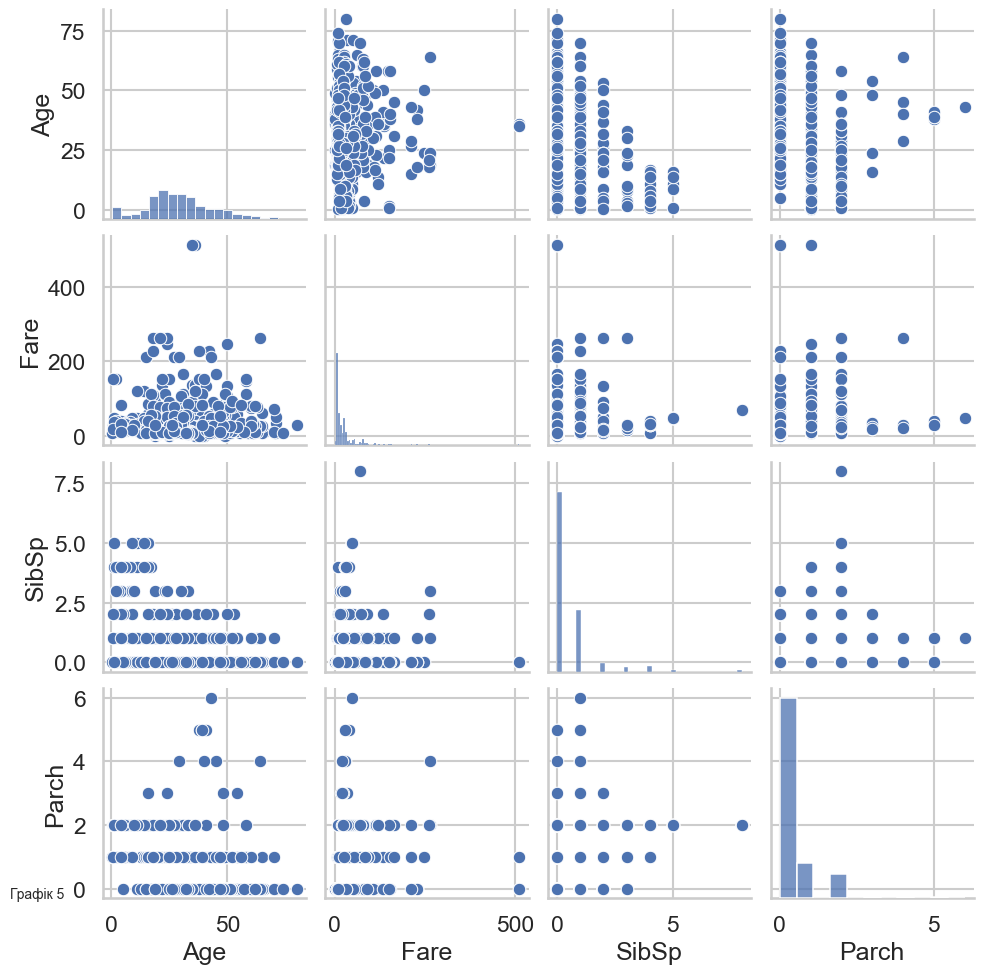

In [354]:
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(dataset[numeric_vars], diag_kind='hist')
plt.text(-25, 0, 'Графік 5', fontsize=10, ha='left')
plt.show()

Ваші висновки: на графіку 5 можна побачити що pairplot допомагає візуалізувати зв’язки між числовими змінними, але не виявляє сильних лінійних кореляцій між ними. Молоді пасажири зазвичай мали дешеві квитки. Деякі пасажири, які мали більшу кількість родичів, могли бути молодшими. Пасажири з більшою кількістю родичів на борту, мали дешевші квитки, але були вийнятки.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.